In [105]:
import glob
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle 
import pyLDAvis

import sys
sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')
from utils.helper import preprocess_tweet, sentence_to_words, lemmatization

In [2]:
df = pd.read_csv('./../../data/fintech/lendingkart/lendingkart.csv')

In [3]:
df.shape

(5490, 27)

In [4]:
pre_df = df[df['date'] < '2020-02-01']
post_df = df[df['date'] >= '2020-02-01']

## Preprocessing

In [5]:
# Preprocess tweets
pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1398106268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1398106268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)


In [6]:
# Create words data
pre_data = pre_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
pre_data_words = list(sentence_to_words(pre_data))

# Create words data
post_data = post_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
post_data_words = list(sentence_to_words(post_data))

In [7]:
# For pre-covid period
# Build bigram and trigram models
pre_bigram = gensim.models.phrases.Phrases(pre_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
pre_trigram = gensim.models.phrases.Phrases(pre_bigram[pre_data_words], threshold=100)

pre_bigram_model = gensim.models.phrases.Phraser(pre_bigram)
pre_trigram_model = gensim.models.phrases.Phraser(pre_trigram)

# For post-covid period
# Build bigram and trigram models
post_bigram = gensim.models.phrases.Phrases(post_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
post_trigram = gensim.models.phrases.Phrases(post_bigram[post_data_words], threshold=100)

post_bigram_model = gensim.models.phrases.Phraser(post_bigram)
post_trigram_model = gensim.models.phrases.Phraser(post_trigram)

In [8]:
# Remove stopwords
pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/4258172292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/4258172292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)


In [9]:
pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/3599064045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/3599064045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])


In [10]:
pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1623641631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1623641631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])


In [11]:
pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1589984664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/1589984664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])


In [12]:
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [13]:
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [14]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [15]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.015*"lendingkart" + 0.010*"business" + 0.009*"loan" + 0.006*"indian" + '
  '0.005*"new" + 0.005*"like" + 0.005*"companies" + 0.005*"heres" + '
  '0.005*"help" + 0.005*"ur"'),
 (1,
  '0.035*"thank" + 0.028*"carecom" + 0.023*"hello" + 0.017*"details" + '
  '0.015*"share" + 0.015*"registered_contact" + 0.013*"representatives" + '
  '0.013*"assist" + 0.013*"concern" + 0.012*"inconvenience_caused"'),
 (2,
  '0.079*"raises" + 0.078*"working_capital" + 0.074*"indias_lendingkart" + '
  '0.074*"help_small" + 0.073*"businesses_access" + 0.009*"techcrunch" + '
  '0.005*"new" + 0.005*"business" + 0.004*"heres" + 0.004*"nbfc"'),
 (3,
  '0.021*"lendingkart" + 0.008*"business" + 0.008*"free" + '
  '0.007*"access_working" + 0.007*"capital" + 0.007*"loan" + '
  '0.007*"existing_investors" + 0.007*"raises_series" + 0.007*"total_raised" + '
  '0.006*"bringing"'),
 (4,
  '0.029*"lendingkart" + 0.021*"alteria_capital" + 0.015*"lendingkart_raises" '
  '+ 0.014*"raised" + 0.012*"led" + 0.012*"crore

In [16]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [17]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.032*"lendingkart" + 0.011*"want" + 0.011*"cr" + 0.009*"rs_crore" + '
  '0.008*"month" + 0.007*"loan" + 0.007*"business" + 0.006*"loans" + '
  '0.005*"fintech" + 0.005*"data"'),
 (1,
  '0.015*"reply" + 0.013*"lendingkart" + 0.011*"company" + 0.009*"raised" + '
  '0.009*"business" + 0.007*"india" + 0.007*"finance" + 0.006*"support" + '
  '0.006*"capital" + 0.005*"payment"'),
 (2,
  '0.082*"serve" + 0.064*"details" + 0.063*"registered_contact" + '
  '0.063*"customer_experience" + 0.062*"share" + 0.062*"officer_shall" + '
  '0.062*"happy" + 0.062*"forward" + 0.061*"contact_solve" + '
  '0.061*"concern_looking"'),
 (3,
  '0.043*"carecom" + 0.014*"request" + 0.014*"emi" + 0.013*"applied" + '
  '0.013*"lendingkart" + 0.012*"experience" + 0.011*"reply" + 0.011*"dm" + '
  '0.009*"mailed" + 0.009*"rbi"'),
 (4,
  '0.060*"team" + 0.045*"dear_sir" + 0.043*"association" + '
  '0.043*"deeply_value" + 0.042*"reassure" + 0.041*"serving" + '
  '0.041*"fully_committed" + 0.040*"details" + 0.040

### Evaluation

In [18]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -10.973651624026603


In [19]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -5.731216686736141


## Hyper-parameter tuning

In [20]:
def compute_coherence_values(corpus, dictionary, k, alpha, beta, texts, coherence='u_mass'):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=beta)
    
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, 
                                                        texts=texts, 
                                                        dictionary=dictionary, 
                                                        coherence=coherence)
    
    return coherence_model_lda.get_coherence()

### Pre-COVID

In [21]:
grid = {}
grid['Validation_Set'] = {}

In [22]:
corpus = pre_corpus

In [23]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [24]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [25]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=pre_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=pre_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pre_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [26]:
pre_df_result

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-10.313011
1,75% Corpus,2,0.01,0.31,-9.964101
2,75% Corpus,2,0.01,0.61,-10.403209
3,75% Corpus,2,0.01,0.91,-10.074227
4,75% Corpus,2,0.01,symmetric,-9.867330
...,...,...,...,...,...
1735,100% Corpus,30,asymmetric,0.01,-12.641898
1736,100% Corpus,30,asymmetric,0.31,-11.886713
1737,100% Corpus,30,asymmetric,0.61,-12.627834
1738,100% Corpus,30,asymmetric,0.91,-11.861413


In [49]:
# pre_df_result.to_csv("./../../data/fintech/lendingkart/pre.csv")

In [50]:
# Maximum coherence
pre_df_result[pre_df_result['Coherence'] == pre_df_result['Coherence'].max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
948,100% Corpus,4,0.91,0.91,-6.924567


In [61]:
pre_topics_score = []
for i in pre_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = pre_df_result[(pre_df_result['Topics'] == i) & (pre_df_result['Alpha'] == pre_df_result['Alpha'].unique()[3]) & (pre_df_result['Beta'] == pre_df_result['Beta'].unique()[3])]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    pre_topics_score.append(data)

In [62]:
pre_ts_df = pd.DataFrame(pre_topics_score)
pre_ts_df.columns = ['topics', 'coherence']

In [63]:
pre_ts_df.sort_values('topics', inplace=True)
pre_ts_df.head()

,topics,coherence
0,2,-8.794944
15,3,-8.147617
27,4,-6.924567
26,5,-7.293230
25,6,-8.129940


<AxesSubplot: xlabel='topics'>

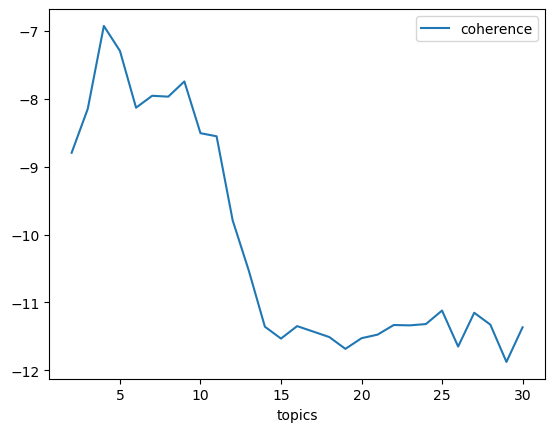

In [64]:
pre_ts_df.plot.line(x='topics', y='coherence')

In [65]:
pre_df_result[pre_df_result['Topics'] == 4]

,Validation_Set,Topics,Alpha,Beta,Coherence
60,75% Corpus,4,0.01,0.01,-10.271997
61,75% Corpus,4,0.01,0.31,-10.310166
62,75% Corpus,4,0.01,0.61,-10.527710
63,75% Corpus,4,0.01,0.91,-10.781992
64,75% Corpus,4,0.01,symmetric,-10.199262
65,75% Corpus,4,0.31,0.01,-10.072179
66,75% Corpus,4,0.31,0.31,-9.720369
67,75% Corpus,4,0.31,0.61,-9.462183
68,75% Corpus,4,0.31,0.91,-11.429320
69,75% Corpus,4,0.31,symmetric,-9.730857


### Post-COVID

In [32]:
grid = {}
grid['Validation_Set'] = {}

In [33]:
corpus = post_corpus

In [34]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [35]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [36]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=post_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=post_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    post_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [37]:
post_df_result.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-4.654281
1,75% Corpus,2,0.01,0.31,-4.997103
2,75% Corpus,2,0.01,0.61,-5.439204
3,75% Corpus,2,0.01,0.91,-6.112097
4,75% Corpus,2,0.01,symmetric,-5.273664


In [48]:
# post_df_result.to_csv("./../../data/fintech/lendingkart/post.csv")

In [66]:
# Maximum coherence
post_df_result[post_df_result['Coherence'] == post_df_result['Coherence'].max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
906,100% Corpus,3,0.31,0.31,-2.600956


In [67]:
post_topics_score = []
for i in post_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = post_df_result[(post_df_result['Topics'] == i) & (post_df_result['Alpha'] == 0.31) & (post_df_result['Beta'] == 0.31)]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    post_topics_score.append(data)

In [68]:
post_ts_df = pd.DataFrame(post_topics_score)
post_ts_df.columns = ['topics', 'coherence']

In [69]:
post_ts_df.sort_values('topics', inplace=True)
post_ts_df.head()

,topics,coherence
0,2,-5.266902
15,3,-2.600956
27,4,-4.121743
26,5,-5.475176
25,6,-3.341852


<AxesSubplot: xlabel='topics'>

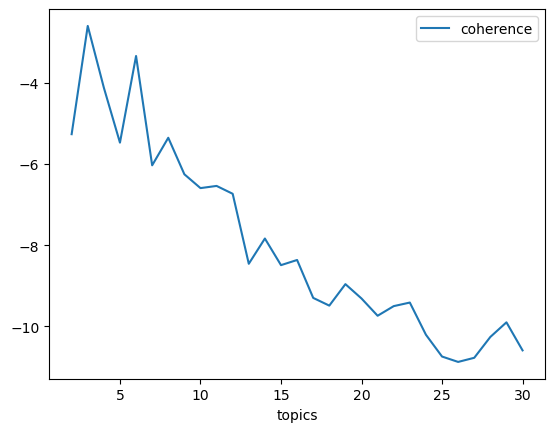

In [70]:
post_ts_df.plot.line(x='topics', y='coherence')

In [71]:
post_df_result[(post_df_result['Topics'] == 3)]

,Validation_Set,Topics,Alpha,Beta,Coherence
30,75% Corpus,3,0.01,0.01,-3.261263
31,75% Corpus,3,0.01,0.31,-2.930297
32,75% Corpus,3,0.01,0.61,-3.353968
33,75% Corpus,3,0.01,0.91,-3.024148
34,75% Corpus,3,0.01,symmetric,-3.368206
35,75% Corpus,3,0.31,0.01,-3.336116
36,75% Corpus,3,0.31,0.31,-3.148272
37,75% Corpus,3,0.31,0.61,-3.593593
38,75% Corpus,3,0.31,0.91,-3.047007
39,75% Corpus,3,0.31,symmetric,-3.199338


## Final Models

### Pre-COVID

In [72]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=4,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=pre_df_result['Alpha'].unique()[3],
                                        eta=pre_df_result['Alpha'].unique()[3])

In [73]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -7.097591841005574


### Post-COVID

In [76]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=3,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.31,
                                        eta=0.31)

In [77]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -3.2576656642336856


## Inferencing

In [100]:
def dominant_topics(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j==0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                    pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True
                )
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

In [106]:
pre_df_topic_sents_keywords = dominant_topics(
   ldamodel=pre_final_lda_model, corpus=pre_corpus, texts=pre_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/2297222571.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [107]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,2,0.7898,"thank, hello, carecom, loan, assist, details, ...","[hello, seemant, regret, inconvenience_caused,..."
1,1,0.6428,"lendingkart, heres, business, loan, know, help...","[sir, got, message, request, consider, issuing..."
2,2,0.3873,"thank, hello, carecom, loan, assist, details, ...","[banknbfc, carecom]"
3,1,0.6512,"lendingkart, heres, business, loan, know, help...","[profitable, indian, sme, cr, turnover, good, ..."
4,2,0.7924,"thank, hello, carecom, loan, assist, details, ...","[mobile_number, mail, jawedqamar, com, jj, ent..."
...,...,...,...,...
1430,2,0.8189,"thank, hello, carecom, loan, assist, details, ...","[hi, avinash, regret, inconvenience_caused, sh..."
1431,2,0.8427,"thank, hello, carecom, loan, assist, details, ...","[wish, let, guys, know, running, scam, horribl..."
1432,0,0.3552,"lendingkart, india, alteria_capital, team, cap...",[lendingkart]
1433,1,0.3130,"lendingkart, heres, business, loan, know, help...","[yup, thats]"


In [113]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['thank, hello, carecom, loan, assist, details, share, business, days, company',
       'lendingkart, heres, business, loan, know, help, growth, business_loan, need, work',
       'lendingkart, india, alteria_capital, team, capital, raised, lendingkart_raises, existing_investors, million, led',
       'raises, working_capital, indias_lendingkart, help_small, businesses_access, techcrunch, sector, industry, lendingkart, msmes'],
      dtype=object)

In [109]:
post_df_topic_sents_keywords = dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_2708/2297222571.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [112]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1,0.9751,"lendingkart, emi, loan, moratorium, number, co...","[loan_id, lai, reverse, covid, releaf, govt, e..."
1,1,0.9751,"lendingkart, emi, loan, moratorium, number, co...","[loan_id, lai, reverse, covid, releaf, govt, e..."
2,1,0.9427,"lendingkart, emi, loan, moratorium, number, co...","[recvd, thing, end, kindly, let, know, getting..."
3,1,0.9002,"lendingkart, emi, loan, moratorium, number, co...","[dear, asking, restructuring, forcing, settle,..."
4,2,0.9581,"serve, share, registered_contact, details, cus...","[hello, kindly_dm, share, registered_contact, ..."
...,...,...,...,...
4050,1,0.6735,"lendingkart, emi, loan, moratorium, number, co...","[speaker, alert, join, mithun_sundar, ceo, mit..."
4051,1,0.9668,"lendingkart, emi, loan, moratorium, number, co...","[union, earmarked, rs_crore, ministry, announc..."
4052,1,0.9400,"lendingkart, emi, loan, moratorium, number, co...","[satisfied, hona, hai, aur, mera, documents, a..."
4053,1,0.9822,"lendingkart, emi, loan, moratorium, number, co...","[help, mai, se, loan, apply, kiya, approval, h..."


In [114]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['lendingkart, emi, loan, moratorium, number, company, reach, mail, able, trying',
       'serve, share, registered_contact, details, customer_experience, kindly_dm, officer_shall, happy, contact_solve, forward',
       'team, association, deeply_value, reassure, details, fully_committed, soon, serving, giving, chance'],
      dtype=object)

In [110]:
pre_df_topic_sents_keywords['Dominant_Topic'].value_counts()

0    479
1    333
2    329
3    294
Name: Dominant_Topic, dtype: int64

In [111]:
post_df_topic_sents_keywords['Dominant_Topic'].value_counts()

1    2191
0    1094
2     770
Name: Dominant_Topic, dtype: int64